In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
BASE = "../analysis/"
OUT  = "../analysis/figures/"

os.makedirs(OUT, exist_ok=True)

amr = pd.read_csv(BASE + "amr_master.tsv", sep="\t")
matriz = pd.read_csv(BASE + "matriz_presencia_ausencia_amr.csv", index_col=0)

amr.head()

,Protein id,Contig id,Start,Stop,Strand,Element symbol,Element name,Scope,Type,Subtype,...,Target length,Reference sequence length,% Coverage of reference,% Identity to reference,Alignment length,Closest reference accession,Closest reference name,HMM accession,HMM description,Species
0,NaN,NZ_CP026041.1,2639419,2641017,-,tet(35),tetracycline efflux Na+/H+ antiporter family t...,core,AMR,AMR,...,533,533,100.0,99.81,533,WP_005480402.1,tetracycline efflux Na+/H+ antiporter family t...,NaN,NaN,V_parahaemolyticus
1,NaN,NZ_CP026041.1,3109082,3109543,-,tet(34),oxytetracycline resistance phosphoribosyltrans...,core,AMR,AMR,...,154,154,100.0,92.21,154,WP_005592781.1,oxytetracycline resistance phosphoribosyltrans...,NaN,NaN,V_parahaemolyticus
2,NaN,NZ_CP026042.1,967271,968119,+,blaCARB-30,carbenicillin-hydrolyzing class A beta-lactama...,core,AMR,AMR,...,283,283,100.0,100.00,283,WP_005498292.1,carbenicillin-hydrolyzing class A beta-lactama...,NaN,NaN,V_parahaemolyticus
3,NaN,NZ_CP009982.1,2081630,2083228,-,tet(35),tetracycline efflux Na+/H+ antiporter family t...,core,AMR,AMR,...,533,533,100.0,99.25,533,WP_005480402.1,tetracycline efflux Na+/H+ antiporter family t...,NaN,NaN,V_parahaemolyticus
4,NaN,NZ_CP009982.1,2553486,2553947,-,tet(34),oxytetracycline resistance phosphoribosyltrans...,core,AMR,AMR,...,154,154,100.0,92.21,154,WP_005592781.1,oxytetracycline resistance phosphoribosyltrans...,NaN,NaN,V_parahaemolyticus


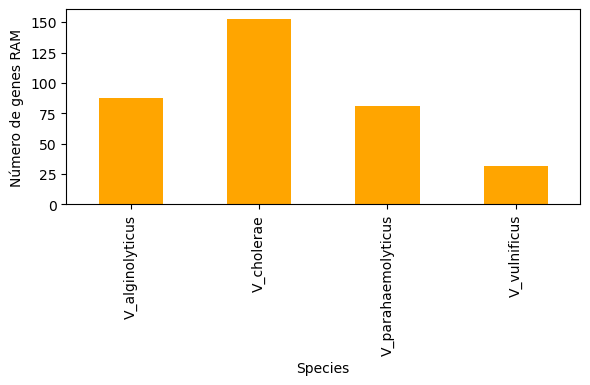

In [6]:
totales = amr.groupby("Species").size()

plt.figure(figsize=(6,4))
totales.plot(kind="bar", color ='orange')
plt.ylabel("Número de genes RAM")
plt.tight_layout()

plt.savefig(OUT + "Figura1_totales.png", dpi=300)
plt.show()

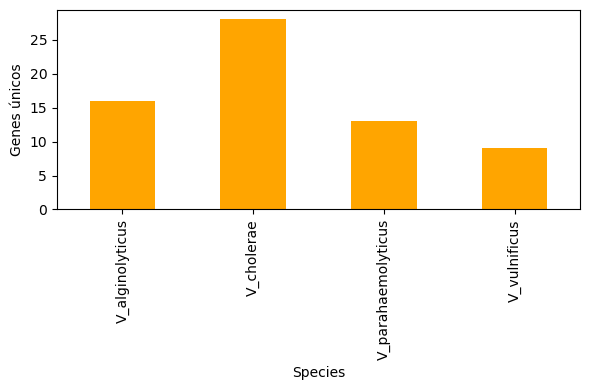

In [7]:
unicos = amr.groupby("Species")["Element symbol"].nunique()

plt.figure(figsize=(6,4))
unicos.plot(kind="bar", color ='orange')
plt.ylabel("Genes únicos")
plt.tight_layout()

plt.savefig(OUT + "Figura2_unicos.png", dpi=300)
plt.show()

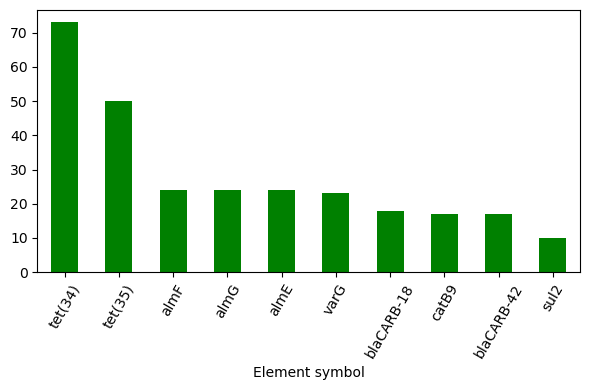

In [8]:
top = amr["Element symbol"].value_counts().head(10)

plt.figure(figsize=(6,4))
top.plot(kind="bar", color = 'green')
plt.xticks(rotation=60)
plt.tight_layout()

plt.savefig(OUT + "Figura3_top_genes.png", dpi=300)
plt.show()

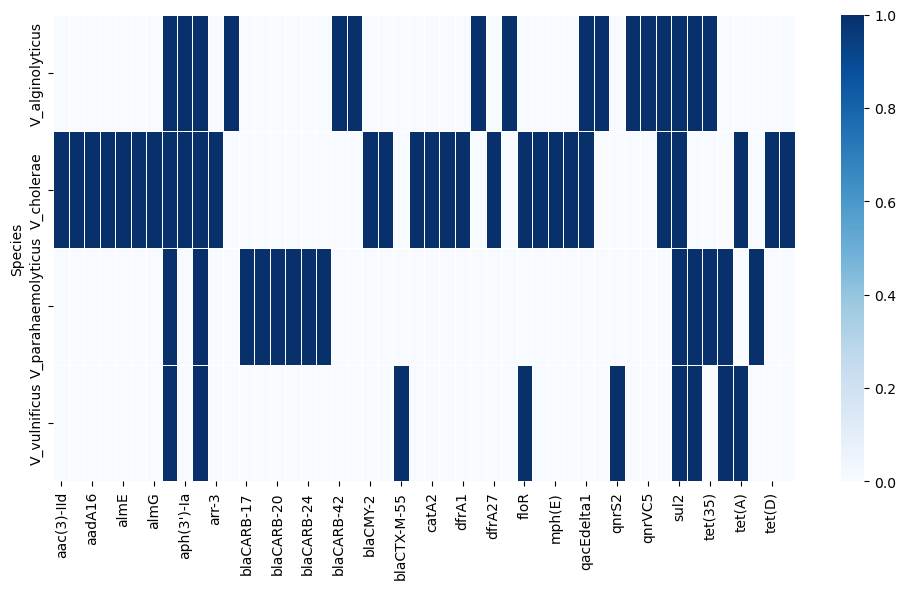

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(matriz, cmap="Blues", linewidths=0.5)

plt.tight_layout()
plt.savefig(OUT + "Figura4_heatmap.png", dpi=300)
plt.show()